In [180]:
import pandas as pd
import numpy as np
import scipy as sp 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [181]:
data = pd.read_csv("LoanStats3c.csv")

# Data Cleaning

### Data description and corresponding usage

* id - keep (no analysis)

* member_id - keep (no analysis)

* loan_amnt - relevant

* funded_amnt  - relevant but nearly same as loan_amnt (see correlation matrix) - try to create a new feature

* funded_amnt_inv - almost same as funded_amnt ( can be removed)

* term - 36 or 60 - (changes made -Kaustubh **this can give the algorithm the idea of whether shorter loans are better or longer ones**)

* int_rate - relevant (can vary as a function of risk of the corresponding loan)

* installment - (very relevant)takes in account the term factor and loan_amnt together - we can remove 'term' column - but we should not remove loan_amnt because it gives the information about how big a loan is ? . 

* grade - LC determined value (grading scheme not clear) 

* sub_grade - LC determined value (grading scheme not clear)

* emp_title - Not relevant (since it does not gives us information about the financial condition of the borrower)

* emp_length - does provide information about the credibility of the borrower (needs cleaning - use regular expressions)

* home_ownership - relevant (provides information about the financial condition and other collateral the borrower has)

* annual_inc - very relevant (if the annual income of the borrower is not greater than the annual installments needs to be paid then its a bad loan)

* verification_status - relevant (we can provide a value corresponding to each factor or let the algorithm decide these values

* issue_d - irrelevant (does not provide any information about anything)

* loan_status - LABEL (Current loans needs to be removed)

* pymnt_plan - relevant(may add some information )

* url - irrelevant

* desc - relevant (may provide information about the intensions or behavior of the borrower) - Needs to remove NaN by some value

* purpose - relevant 

* title - same as purpose (remove either)

* zip_code - not relevant (can be replaced by the addr_state )

* dti - very relevant (debt to income ratio) - can think of removing income and loan_amnt for once

* delinq_2yrs - relevant (in terms of frequency)

* earlies_cr_line - relevant (can remove the month -year is relevant)

* inq_last_6mths - relevant inquiries ragarding loans in last 6 months 

* mths_since_last_delinq - relevant (need to deal with missing values)

* mths_since_last_record - relevant (need to deal with missing values)

* open_acc - relevant (open credit lines)

* pub_rec - relevant (negative factor)

* revol_bal - relevant (may be correlated to the amount of credit)

* total_acc - relevant (total number of credit lines currently in borrower's credit file )

* initial_list_status - relevant (initial listing status of loan ) (W,F -meaning not known till now)

* out_prncp - relevant 

* total_pymnt - relevant but correlated to out_prncp (see correlation)

* total_pymnt_inv - nearly same as total_pymnt (see similarity)

* total_rec_prncp - principal recieved till date (relevant)

* total_rec_late_fee - late fees recieved to date (relevance to be decided )

* total_rec_int - interest recieved till date

* recoveries - post charge off gross recovery (to be decided)

* collection_recovery_fee - post charge off collection fee () 

* last_pymnt_d - may be relevant

* last_pymnt_amnt - may be relevant

* next_pymnt_d - may be relevant

* last_credit_pull_d - The most recent month LC pulled credit for this loan ( may or may not be relevant)

* collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections (relevant)

* mths_since_last_major_derog - Months since most recent 90-day or worse rating **find out the meaning** and then decide relevance

* policy_code - relevant (1 or 2) -decided according to the FICO scores

* application_type - individual or joint ( may be relevant)

* annual_inc_joint - relevant (but have lots of missing values for individual accounts)

* dti_joint - same case as above

* verification_status_joint - same as above

* acc_now_delinq - the number of accounts on which the borrower is now delinquent (relevant)

* tot_coll_amt - total collection amounts ever owed (relevant)

* tot_cur_bal - total current balance of all accounts (relevant) - try to make a new feature 

* open_acc_6m - Number of open trades in the last 6 months (many NaN values to deal with)

* open_il_6m - Number of currently active installment trades (lot of NaN values)

* open_il_12m - Number of installment accounts opened in past 12 months

* open_il_24m - Number of installment accounts opened in past 24 months

* mths_since_rcnt_il - months since most recent installment accounts openend 

* total_bal_il - total current balance of all installment accounts

* il_util - relevant (deal with NaNs) (ratio of total current balaance to high creditt/credit limit on all install acct

* open_rv_12m - Number of revolving trades in past 12 months (may or may not be )

* open_rv_24m - in past 24 months (Same)

* max_bal_bc - Maximum current balance owed on all revolving accounts (relevant) NaNs

* all_util - Balance to credit limit on all trades (relevant but NaNs)

* total_credit_rv - Total credit line on open revolving accounts (very relevant) -Try to create a new feature vector

* inq_fi - Number of personal finance inquiries (Lot of NaNs (scrutiny)

* total_fi_tl - Number of finance trades (may or may not be) (Lot of NaNs)

* inq_last_12m -Number of credit inquiries in past 12 months (Lot of NaNs) (scrutiny)

### First we need to remove the Current loans

In [182]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
0,36805548,39558264,10400,10400,10400,36 months,6.99%,321.08,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN
1,38098114,40860827,15000,15000,15000,60 months,12.39%,336.64,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN
2,37612354,40375473,12800,12800,12800,60 months,17.14%,319.08,D,D4,...,NaN,NaN,NaN,NaN,NaN,NaN,5700,NaN,NaN,NaN
3,37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,27600,NaN,NaN,NaN
4,37842129,40605224,21425,21425,21425,60 months,15.59%,516.36,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,21500,NaN,NaN,NaN


### Removing the Current loans

In [183]:
df = data[-(data.loan_status == 'Current')]

### Removing NaN values

In [184]:
df = df[-df.loan_status.isnull()]

In [185]:
df.loan_status

3                 Fully Paid
5                Charged Off
6         Late (31-120 days)
11                Fully Paid
12                Fully Paid
17                Fully Paid
24                Fully Paid
28        Late (31-120 days)
29                Fully Paid
32                Fully Paid
35                Fully Paid
37                Fully Paid
40                Fully Paid
50                Fully Paid
55                Fully Paid
56                Fully Paid
61        Late (31-120 days)
68               Charged Off
69                Fully Paid
70                Fully Paid
75                Fully Paid
78                Fully Paid
84                Fully Paid
85                Fully Paid
87                Fully Paid
90                Fully Paid
97               Charged Off
103               Fully Paid
112               Fully Paid
119               Fully Paid
                 ...        
235558           Charged Off
235559            Fully Paid
235561    Late (31-120 days)
235563        

In [186]:
sum(df.loan_status == 'In Grace Period')

1928

### Removing the "In Grace Period" Loans

These loans will not help us in classifying new loan as bad or good 

In [187]:
df = df[-(data.loan_status == 'In Grace Period')]

In [188]:
len(df.loan_status)

71364

##Kaustubh - I am adding this snippet which will calculate the number of "null" values in each column

In [189]:
missing = []

for col in df.columns:
    missing.append(sum(df[col].isnull()))
    print col + " " + " -- " + " " + str(sum(df[col].isnull()))



id  --  0
member_id  --  0
loan_amnt  --  0
funded_amnt  --  0
funded_amnt_inv  --  0
term  --  0
int_rate  --  0
installment  --  0
grade  --  0
sub_grade  --  0
emp_title  --  3703
emp_length  --  0
home_ownership  --  0
annual_inc  --  0
verification_status  --  0
issue_d  --  0
loan_status  --  0
pymnt_plan  --  0
url  --  0
desc  --  65340
purpose  --  0
title  --  0
zip_code  --  0
addr_state  --  0
dti  --  0
delinq_2yrs  --  0
earliest_cr_line  --  0
inq_last_6mths  --  0
mths_since_last_delinq  --  35266
mths_since_last_record  --  57398
open_acc  --  0
pub_rec  --  0
revol_bal  --  0
revol_util  --  49
total_acc  --  0
initial_list_status  --  0
out_prncp  --  0
out_prncp_inv  --  0
total_pymnt  --  0
total_pymnt_inv  --  0
total_rec_prncp  --  0
total_rec_int  --  0
total_rec_late_fee  --  0
recoveries  --  0
collection_recovery_fee  --  0
last_pymnt_d  --  143
last_pymnt_amnt  --  0
next_pymnt_d  --  65373
last_credit_pull_d  --  10
collections_12_mths_ex_med  --  0
mths_si

## I am going to add this column to a new data frame "null" under "missing" row



In [190]:
colu = list(df.columns)

missing = np.array(missing)

missing = missing.reshape(1,-1)

null = pd.DataFrame(data = missing,columns = colu)

## So that at any point of time we can simply write the following to find out the number of missing values in the column

In [191]:
null['desc']

0    65340
Name: desc, dtype: int64

### Giving Binary values to the loan_status variable which classifies them as good(1) or bad(0) loan

In [192]:
Label = []

for status in df.loan_status:
    if status == "Fully Paid":
        status = 1
        Label.append(status)
    else:
        status = 0
        Label.append(status)
        
        

In [193]:
df.loan_status = Label

In [194]:
df.loan_status

3         1
5         0
6         0
11        1
12        1
17        1
24        1
28        0
29        1
32        1
35        1
37        1
40        1
50        1
55        1
56        1
61        0
68        0
69        1
70        1
75        1
78        1
84        1
85        1
87        1
90        1
97        0
103       1
112       1
119       1
         ..
235558    0
235559    1
235561    0
235563    1
235564    1
235565    1
235567    1
235570    1
235571    1
235581    1
235584    1
235585    1
235595    0
235596    0
235598    0
235599    1
235600    0
235601    1
235603    1
235605    1
235606    1
235608    1
235609    1
235616    1
235619    1
235620    0
235621    0
235622    1
235625    0
235626    1
Name: loan_status, dtype: int64

In [195]:
sum(df.loan_status)

52023

In [196]:
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
member_id,1.000000,-0.026698,-0.026698,-0.026478,-0.040536,-0.008128,-0.024568,0.064463,-0.000418,-0.085196,...,NaN,NaN,NaN,NaN,NaN,NaN,0.026991,NaN,NaN,NaN
loan_amnt,-0.026698,1.000000,1.000000,0.999997,0.954410,0.410343,-0.061475,0.019603,-0.000564,-0.010466,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362353,NaN,NaN,NaN
funded_amnt,-0.026698,1.000000,1.000000,0.999997,0.954410,0.410343,-0.061475,0.019603,-0.000564,-0.010466,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362353,NaN,NaN,NaN
funded_amnt_inv,-0.026478,0.999997,0.999997,1.000000,0.954396,0.410374,-0.061480,0.019575,-0.000588,-0.010487,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362353,NaN,NaN,NaN
installment,-0.040536,0.954410,0.954410,0.954396,1.000000,0.407429,-0.049969,0.013022,0.011715,0.012371,...,NaN,NaN,NaN,NaN,NaN,NaN,0.341205,NaN,NaN,NaN
annual_inc,-0.008128,0.410343,0.410343,0.410374,0.407429,1.000000,0.084076,-0.226094,0.052931,0.057332,...,NaN,NaN,NaN,NaN,NaN,NaN,0.337263,NaN,NaN,NaN
loan_status,-0.024568,-0.061475,-0.061475,-0.061480,-0.049969,0.084076,1.000000,-0.156588,-0.036069,-0.038670,...,NaN,NaN,NaN,NaN,NaN,NaN,0.062027,NaN,NaN,NaN
dti,0.064463,0.019603,0.019603,0.019575,0.013022,-0.226094,-0.156588,1.000000,-0.011217,-0.000778,...,NaN,NaN,NaN,NaN,NaN,NaN,0.060749,NaN,NaN,NaN
delinq_2yrs,-0.000418,-0.000564,-0.000564,-0.000588,0.011715,0.052931,-0.036069,-0.011217,1.000000,0.032516,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.047581,NaN,NaN,NaN
inq_last_6mths,-0.085196,-0.010466,-0.010466,-0.010487,0.012371,0.057332,-0.038670,-0.000778,0.032516,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000913,NaN,NaN,NaN


### Since correlation of funded amount and loan amount is 1.00000 we can remove one of them (we'll remove funded_amnt)

In [197]:
clean_data = df #so that we can keep the cleaned data as a back up

In [198]:
df.drop("funded_amnt",1,)

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
3,37822187,40585251,9600,9600,36 months,13.66%,326.53,C,C3,Admin Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,27600,NaN,NaN,NaN
5,37662224,40425321,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,18300,NaN,NaN,NaN
6,37800722,40563521,12975,12975,36 months,17.86%,468.17,D,D5,Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,15700,NaN,NaN,NaN
11,37741884,40504905,2500,2500,36 months,11.99%,83.03,B,B5,Manufacturing Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,24300,NaN,NaN,NaN
12,37642222,40405288,5250,5250,36 months,11.44%,172.98,B,B4,Store Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,22000,NaN,NaN,NaN
17,37742142,40505198,2000,2000,36 months,14.99%,69.33,C,C5,practice plan associate,...,NaN,NaN,NaN,NaN,NaN,NaN,15300,NaN,NaN,NaN
24,36109709,38821388,2000,2000,36 months,12.99%,67.38,C,C2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39600,NaN,NaN,NaN
28,37822030,40585070,18450,18450,36 months,14.31%,633.36,C,C4,construction foreman,...,NaN,NaN,NaN,NaN,NaN,NaN,6800,NaN,NaN,NaN
29,37692106,40465191,28000,28000,60 months,10.49%,601.70,B,B3,Humana Cares Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,41700,NaN,NaN,NaN
32,10089665,11941194,8000,8000,36 months,10.49%,259.99,B,B3,Senior Logistics Analyst,...,NaN,NaN,NaN,NaN,NaN,NaN,74700,NaN,NaN,NaN


### Trying to clean emp_length

In [199]:
df.emp_length = df.emp_length.apply(lambda x : x[:-6] if 'years' in x else '<1')

In [200]:
df.emp_length = df.emp_length.astype(object)

### Removing emp_title, issue_d

In [201]:
columns_to_remove = ['emp_title', 'issue_d', 'url', 'zip_code']

In [202]:
for column in columns_to_remove:
    df = df.drop(column, axis=1)

In [203]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m
3,37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,27600,NaN,NaN,NaN
5,37662224,40425321,7650,7650,7650,36 months,13.66%,260.20,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,18300,NaN,NaN,NaN
6,37800722,40563521,12975,12975,12975,36 months,17.86%,468.17,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,15700,NaN,NaN,NaN
11,37741884,40504905,2500,2500,2500,36 months,11.99%,83.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,24300,NaN,NaN,NaN
12,37642222,40405288,5250,5250,5250,36 months,11.44%,172.98,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,22000,NaN,NaN,NaN


In [204]:
df.purpose.describe()

count                  71364
unique                    13
top       debt_consolidation
freq                   44681
Name: purpose, dtype: object

In [205]:
df.title.describe()

count                  71364
unique                  1010
top       Debt consolidation
freq                   43623
Name: title, dtype: object

In [206]:
sum(df.emp_length == 10)

0

In [207]:
df.emp_length.dtype

dtype('O')

In [208]:
sum(df.emp_length.isnull()) # no null values

0

In [209]:
import re #regular expressions (ABhinav dekh le)

In [210]:
emp = []
for i in df.emp_length:
    emp.append(re.sub('[^A-Za-z0-9]+', '', i))


In [211]:
df.emp_length = emp

In [212]:
df.emp_length.dtype

dtype('O')

#We need to change the data type to int64

In [213]:
df.emp_length = df.emp_length.astype(int)

In [214]:
df.emp_length.dtype #done

dtype('int64')

In [215]:
df.emp_length.head

<bound method Series.head of 3         10
5          1
6         10
11         1
12         2
17         8
24         1
28        10
29         2
32         3
35        10
37         5
40         4
50         4
55         1
56         2
61         4
68         9
69         5
70         7
75         1
78         2
84         7
85         2
87         2
90        10
97         1
103        1
112       10
119       10
          ..
235558    10
235559    10
235561     1
235563     1
235564     2
235565    10
235567    10
235570    10
235571     1
235581    10
235584     2
235585     1
235595    10
235596     4
235598     1
235599     9
235600     1
235601    10
235603     4
235605     1
235606     1
235608    10
235609     1
235616     1
235619     7
235620     5
235621     3
235622    10
235625    10
235626     3
Name: emp_length, dtype: int64>

In [216]:
df.int_rate.head()


3      13.66%
5      13.66%
6      17.86%
11     11.99%
12     11.44%
Name: int_rate, dtype: object

#Converting the datatype of "int_rate" from object to float64 and removing "%" sign

In [217]:
df.int_rate = [x[:-1] for x in df.int_rate]

In [218]:
df.int_rate.head()

3      13.66
5      13.66
6      17.86
11     11.99
12     11.44
Name: int_rate, dtype: object

In [219]:
df.int_rate = df.int_rate.astype(float)

In [220]:
df.int_rate.describe()

count    71364.000000
mean        14.374701
std          4.429493
min          6.000000
25%         11.670000
50%         13.980000
75%         16.990000
max         26.060000
Name: int_rate, dtype: float64

In [221]:
null.int_rate #so no missing values

0    0
Name: int_rate, dtype: int64

## This plot is showing the mean value of loan_status for a particular home_ownership value

ERROR! Session/line number was not unique in database. History logging moved to new session 72


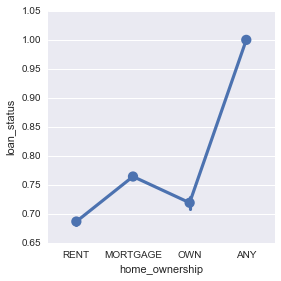

In [225]:
sns.factorplot(x="home_ownership",y="loan_status",data = df)

In [226]:
df.home_ownership.factorize

<bound method Series.factorize of 3             RENT
5             RENT
6             RENT
11        MORTGAGE
12            RENT
17            RENT
24            RENT
28        MORTGAGE
29        MORTGAGE
32        MORTGAGE
35        MORTGAGE
37            RENT
40            RENT
50            RENT
55            RENT
56             OWN
61             OWN
68            RENT
69            RENT
70             OWN
75        MORTGAGE
78        MORTGAGE
84        MORTGAGE
85        MORTGAGE
87        MORTGAGE
90             OWN
97        MORTGAGE
103           RENT
112           RENT
119           RENT
            ...   
235558    MORTGAGE
235559    MORTGAGE
235561        RENT
235563        RENT
235564    MORTGAGE
235565    MORTGAGE
235567    MORTGAGE
235570    MORTGAGE
235571        RENT
235581    MORTGAGE
235584    MORTGAGE
235585        RENT
235595         OWN
235596    MORTGAGE
235598    MORTGAGE
235599    MORTGAGE
235600        RENT
235601    MORTGAGE
235603        RENT
235605        RE

In [229]:
np.mean(df[df.home_ownership == "OWN"].loan_status)

0.7190546528803545

In [245]:
df.annual_inc.dtype

dtype('O')

In [266]:
null['id'][0]

0

In [269]:
to_remove = []

for i in df.columns:
    if null[i][0] == 71364:
        to_remove.append(i)
        
to_remove

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_fi_tl',
 'inq_last_12m']

In [270]:
df1 = df #keeping the version of df as df1

In [271]:
for feat in to_remove:
    df = df.drop(feat,axis = 1)

In [272]:
len(df.columns)

53

In [273]:
for i in df.columns:
    if null[i][0] > 50000:   #These features should also be removed as it'll be difficult to fill these missing values from a regression fitting as the available values are very less and missing values are very large
        print i

desc
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog
